In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, special

Consider a random sample of 10 people, where the responses are 'No' (coded 0) and 'Yes' (1) to a question, and we expect the proportion of people from the population that answer 'Yes' to be small. If the responses from the random sample are independent of one another, then the total number of 'Yes' responses follows a binomial distribution. For example, if we believe that the proportion is about 1/10th of people, then we could write a Null Hypothesis as

$H_0$: $p = p_0 = .1$

Thus, if Y is the total number of people in our random sample of 10 answering 'Yes', then the distribution for Y under the null hypothesis would be a Binomial Distribution with $N = 10, p = .1$. Here, $Y = {0,1,2,...,10}$ and we can easily compute the probability at each Y as

P(Y = y) = $\binom{10}{y}$$(.1)^y$$(1 - .1)^{10-y}$

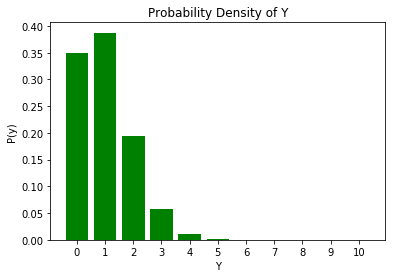

In [193]:
N = 10; p = .1
y = np.arange(N+1,dtype=int)
py = stats.binom(N,p).pmf(y)
plt.bar(y,py,color='green')
plt.xlabel('Y')
plt.ylabel('P(y)')
plt.xticks(y)
plt.title('Probability Density of Y')
plt.show()

This is the distribution of Y IF the population that we sampled from has the distribution specified in the null hypothesis. For a hypothesis test, consider a one-sided test, with the alternative hypothesis being

$H_\alpha :$ $p = p_1 > p_0$

And let's use an alpha level of $\alpha = .05$. The alpha level of the test is the probability that the test indicates that the alternative hypothesis is chosen over the null hypothesis, $H_0$. To figure out the rejection region for this test, we'd need to find the value of Y where the probability of finding Y at or above is equal to our alpha level. So we would need to consider the probability that Y is above some number y, given our null hypothesis is true, or:

In [194]:
alpha = .05
1-stats.binom(N,p).cdf(y) < alpha #probability that Y > y exceeds .05

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In this case, the probability that we get Y being greater than 3, given our null hypothesis is true, is our smallest case. So here, we would reject Y > 3, or $Y \geq 4$, meaning that 4 would be our critical value, and we would have enough evidence to reject the null hypothesis in favor of the alternative if Y exceeds 3, which makes sense if our alternative hypothesis has a higher proportion. 

We could also get this critical value as:

In [195]:
crit_val = int(stats.binom(N,p).ppf(1-alpha) + 1)
crit_val

4

So if our random sample had 3 subjects responding affirmatively, then we could compute a probability value or p-value for how unusual it would be to find 3 'Yes' responses in a random sample of 10 if the proportion was indeed .1. This p=value is:

In [196]:
y1 = 3
1-stats.binom(N,p).cdf(y1-1)

0.07019082639999996

Since this is above our alpha level, we would fail to reject the null hypothesis here. This means that, while the sample proportion might have been higher than what our hypothesis would suggest, it is within the realm of probabilities that could occur just by chance in a random sample of 10, even if the null hypothesis were true. 

The alpha level is related to the confidence level- a 5% alpha corresponds to a 95% confidence level, and so on. The confidence level is the probability that we correct fail to reject the null hypothesis if it were the truth. However, there is another type of inherent error here- beta error, or related to the power of the test. What is meant by this is that, if the null hypothesis were instead not true, and were equal to an alternative, we could mistakenly fail to reject the null hypothesis. This is known as a type 2 error, and has probability $\beta$. The power of the statistical test, $1 - \beta$, is the probability that we correctly reject the null in favor of the alternative hypothesis, if an alternative were true. 

Typically, when the power of a test is computed, we choose the alternative hypothesis to be as large as our sample proportions, and we base it off of this difference versus the critical value of the test. So here, to compute the power of the test, we would need to find the probability that we would not reject the null hypothesis, given that the truth is in the sample.

In [197]:
power = 1 - stats.binom(N,y1/N).cdf(crit_val - 1)
power

0.35038928160000016

This means that this test fails to detect a difference as significant about 2/3 of the time. This isn't great, and typically, the only guidance that one gets on increasing both the confidence and the power is to increase the sample size. However, there is a related test that has a higher power given the same confidence level, and it is the negative binomial test. It can be understood as follows:

Suppose that instead of collecting a fixed sample size of 10, you run a random sample until you find 3 people who answer 'Yes' and then stop the experiment and count how many people you have and how many people were asked the question before each 'Yes' response arrived. Suppose that it takes you 2 people to get the first 'Yes', 4 for the next 'Yes' and 4 for the last 'Yes' and then you stop the experiment at 10 people total. How can this be used for statistical testing, let alone increase statistical power?

Well, first off, they seem like similar samples. One could notice that with a binomial sample of size 10, for example, if you have 3 'Yes' and 7 'No' responses, then for the 10 responses, in order, you could have $\binom{10}{3} = 120$ different potential samples. With the negative binomial sampling technique, we'd sample new members of the population until we obtain 3 'Yes' responses. With the negative binomial sample, the fact that we stopped at 10 total sampled from the population means that we could potentially have had 1, then 1, then 8, or 1, then 2 then 7, and so on. How many of these are there, taking into account 'swaps' (So 1,2, then 7 would be different from 2,1,7)? 

This is akin to asking how many distinct tuples of 3 positive integers there are such that they add up to 10. Since we select up to the third 'Yes', then the last result will have to be a 'yes', meaning that we are left with figuring out how 2 other 'yes' can go into the other 9 spots, so this means that we will have a total of $\binom{9}{2} = 36$ total possibilities with this. So clearly, they can model the same type of information, both of these techniques, but the way that they do so changes something.

What about the alpha and beta of this theoretical negative binomial experiment?

A negative binomial experiment will select another response randomly from the population until we have 3 'Yes' responses. So the total number sampled, W, until we obtain this is distributed as 3 + $NBin(3,1-p)$ and has support N = {3,4,5,...} and we could potentially go on forever and ever here, sampling until we have 3 of the desired responses. The probability on this support is, for the case where the null hypothesis is true:

$P(N = n)$ = $\binom{N-1}{N-3}$$(.9)^{N-3}$$(.1)^3$

In this case, having to sample 10 people until we find 3 that say 'Yes' randomly has probability:

In [198]:
stats.nbinom(3,1-p).pmf(10-3)

2.624399999999997e-06

This is relatively low. We can visualize the distribution as was done previously with Y:

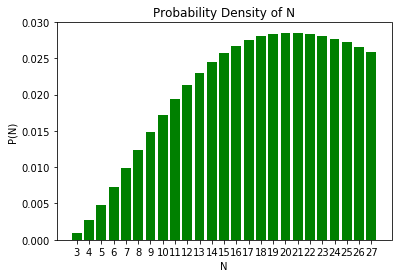

In [199]:
r = 3
n = r + np.arange(25,dtype=int)
pn = stats.nbinom(r,p).pmf(n-r)
plt.bar(n,pn,color='green')
plt.xlabel('N')
plt.ylabel('P(N)')
plt.xticks(n)
plt.title('Probability Density of N')
plt.show()

One can also logically reason that if the true value of p is higher than the null hypothesis suggests, then the total number of samples until we find 3 affirmative responses will be lower than the expected 3/.1 = 30 randomly sampled from our population, rather than a higher number for Y if our p were higher than the null. This means that the rejection region is flipped for the test- we need to reject at or below a certain N. If our alpha level is the same, then we can compute:

In [200]:
pn

array([0.001     , 0.0027    , 0.00486   , 0.00729   , 0.0098415 ,
       0.01240029, 0.01488035, 0.01721869, 0.01937102, 0.02130813,
       0.02301278, 0.02447723, 0.02570109, 0.02668959, 0.02745215,
       0.02800119, 0.02835121, 0.02851798, 0.02851798, 0.02836789,
       0.02808421, 0.027683  , 0.02717968, 0.02658881, 0.02592409])

The first value in this array is the probability that we will find all three 'Yes' in the first three random samples, which has a $(.1)^3$ or 1 in 1000 chance of occuring. So we need to add these until getting to a number that is appropriate:

In [201]:
crit_val2 = int(stats.nbinom(r,p).ppf(alpha) + r - 1)
print(crit_val2,'\n',stats.nbinom(r,p).cdf(crit_val2 - r))

8 
 0.03809179000000001


So we reject when we obtain 8 or less total samples to get to 3 'Yes' responses, which is far lower than the predicted 30 based on the expected value. So is our sample value of 10, which here has p-value of:

In [202]:
stats.nbinom(r,p).cdf(N - r)

0.0701908264

Recall that this is the same p-value from the equivalent binomial test. So realistically, while we may be dealing with different distributions, we are gathering the same p-value. This is often only emphasized during a statistical theory course in college due to the fact that we can use this to compute a negative binomial probability using the usual binomial probability, at least for the cdfs. Stated generally, if:

1. $Y$ ~ $Bin(N,p)$
2. $n$ ~ $y + NBin(y,p)$

Then we can relate the cdf of the negative binomial to the survival function of the regular binomial. However, we can also obtain the equivalent of a p-value here, where p is instead .3 as gathered from the sample:

In [203]:
power2 = stats.nbinom(r,3/N).cdf(crit_val2 - r)
power2

0.4482261899999997

This power is slightly better than was the case with the binomial test, however, it is clearly a promising improvement. Let's continue generalizing to see this effect go further and further, specifically, as far as the estimation and inference for relatively rare events goes. Let's say that instead, we want to test $H_0 :$ $p = p_0 = .015$ vs $H_\alpha :$ $p = p_1 < p_0$. In this case, we want to see if a proportion is rarer than we'd think from the null hypothesis.

Thus, consider two cases, again:

-A random sample of 250, where 2 cases are detected
-A random sample where we sample until 2 cases are detected

In this scenario, we have a classic Binomial test vs Negative Binomial Test. We can use $\alpha = .05$ for both. Ok, so for the binomial test, this would mean we have a critical value of:

In [204]:
alpha = .05
N = 250
p0 = .015
critval1 = int(stats.binom(N,p0).ppf(alpha) - 1)
critval1

0

So we'd reject if we have $Y \leq 8$. For the negative binomial test, at an alpha level of .05, we would reject if we obtain a value above:

In [205]:
r = 2
critval2 = int(stats.nbinom(r,p0).ppf(1-alpha))
critval2

313

So with Y = 2, we would not have enough evidence to reject $H_0$ and at N = 250, we also would not have enough evidence to reject. Now, for the p-values:

In [206]:
pval1 = stats.binom(N,p0).cdf(r-1)
pval1

0.10988575013689811

In [207]:
pval2 = 1 - stats.nbinom(r,p0).cdf(N-r)
pval2

0.10988575013689794

Again, we have identical p-values. So what about the power of the tests?

In [208]:
power1 = stats.binom(N,r/N).cdf(critval1)
power1

0.13425115741143936

In [209]:
power2 = 1 - stats.nbinom(r,r/N).cdf(critval2-r)
power2

0.2852417787817444

So here, we have twice as much power at least for the negative binomial test vs the binomial test. Neither is great, but one clearly is better than the other in terms of rejecting when it needs to reject. Notice how for a binomial sample of size 250, where 2 responses only are affirmative, the total number of ways this can happen is $\binom{250}{2} = 31125$, whereas for the negative binomial sample, since the last sampling has to be a affirmative response, this leaves $\binom{250-1}{2-1} = 249$ ways for this sample.

